In [1]:
import numpy as np
import matplotlib.pyplot as plt
import distributions.priors as priors
import getdist
from getdist import plots, MCSamples
import ndes.ndes as ndes
import delfi.delfi as delfi
import tensorflow as tf
%matplotlib inline

In [2]:
# Set up and load in data and simulations

# Fiducial parameters about which data compression is performed
theta_fiducial = np.array([0.3, 0.8, 0.05, 0.70, 0.96])

# Set up the truncated Gaussian prior...

# Prior parameter boundaries
lower = np.array([0, 0.4, 0, 0.4, 0.7])
upper = np.array([1, 1.2, 0.1, 1.0, 1.3])

# Prior mean and covariance
prior_mean = np.array([0.3, 0.8, 0.05, 0.70, 0.96])
Q = np.eye(5)*np.array([0.1, 0.1, 0.05, 0.3, 0.3])**2

# Create prior over parameters
prior = priors.TruncatedGaussian(prior_mean, Q, lower, upper)

# Import data summaries, simulated data summaries and corresponding parameters, and inverse Fisher matrix...
data = np.genfromtxt('simulators/cosmic_shear_nuisances/results_marginalized/compressed_data.dat')
sim_params = np.genfromtxt('simulators/cosmic_shear_nuisances/results_marginalized/simulations_parameters.dat')
sim_data = np.genfromtxt('simulators/cosmic_shear_nuisances/results_marginalized/simulations_data.dat')
Finv = np.genfromtxt('simulators/cosmic_shear_nuisances/results_marginalized/Finv.dat')

In [3]:
# Create the MAF
MAF = ndes.ConditionalMaskedAutoregressiveFlow(n_inputs=5, n_outputs=5, n_hiddens=[50,50], 
                                               n_mades=5, act_fun=tf.tanh)

In [4]:
# Create the DELFI object
DelfiMAF = delfi.Delfi(data, prior, MAF, Finv, theta_fiducial, 
                       param_limits = [lower, upper],
                       param_names = ['\Omega_m', 'S_8', '\Omega_b', 'h', 'n_s'], 
                       results_dir = "simulators/cosmic_shear/results_preran/")

Generating fisher pre-training data...
Training the neural density estimator...
Epoch 00000, Train_loss: 14.3603, Val_loss: 14.4353
Epoch 00001, Train_loss: 12.1634, Val_loss: 12.2552
Epoch 00002, Train_loss: 11.2360, Val_loss: 11.2672
Epoch 00003, Train_loss: 10.4410, Val_loss: 10.5219
Epoch 00004, Train_loss: 9.3705, Val_loss: 9.3874
Epoch 00005, Train_loss: 8.4836, Val_loss: 8.5225
Epoch 00006, Train_loss: 7.7854, Val_loss: 7.8171
Epoch 00007, Train_loss: 6.9790, Val_loss: 7.0623
Epoch 00008, Train_loss: 6.2769, Val_loss: 6.3306
Epoch 00009, Train_loss: 5.7292, Val_loss: 5.7660
Epoch 00010, Train_loss: 5.1137, Val_loss: 5.1674
Epoch 00011, Train_loss: 4.9861, Val_loss: 5.0521
Epoch 00012, Train_loss: 5.0421, Val_loss: 5.1284
Epoch 00013, Train_loss: 4.5352, Val_loss: 4.6039
Epoch 00014, Train_loss: 4.3626, Val_loss: 4.3887
Epoch 00015, Train_loss: 4.3712, Val_loss: 4.4068
Epoch 00016, Train_loss: 4.1641, Val_loss: 4.2258
Epoch 00017, Train_loss: 4.2832, Val_loss: 4.3700
Epoch 00018,

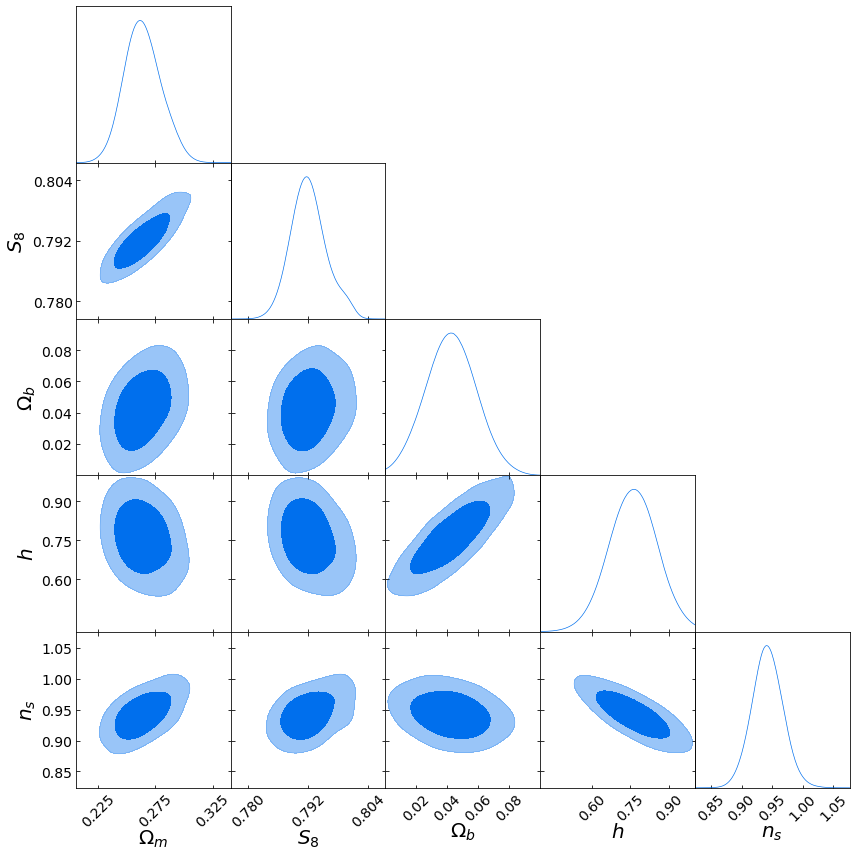

In [5]:
# Do the Fisher pre-training to inirialize the network
DelfiMAF.fisher_pretraining(50000, prior, epochs=100, patience=10)

In [6]:
# Load in the simulations
DelfiMAF.load_simulations(sim_data, sim_params)

Training the neural density estimator...
Epoch 00000, Train_loss: 4.5074, Val_loss: 4.5418
Epoch 00001, Train_loss: 4.2762, Val_loss: 4.3123
Epoch 00002, Train_loss: 4.1681, Val_loss: 4.2176
Epoch 00003, Train_loss: 4.1039, Val_loss: 4.1612
Epoch 00004, Train_loss: 4.0528, Val_loss: 4.1346
Epoch 00005, Train_loss: 4.1028, Val_loss: 4.2081
Epoch 00006, Train_loss: 4.0039, Val_loss: 4.0997
Epoch 00007, Train_loss: 4.0580, Val_loss: 4.1572
Epoch 00008, Train_loss: 3.9703, Val_loss: 4.0539
Epoch 00009, Train_loss: 4.0947, Val_loss: 4.1728
Epoch 00010, Train_loss: 3.9617, Val_loss: 4.0641
Epoch 00011, Train_loss: 3.9409, Val_loss: 4.0633
Epoch 00012, Train_loss: 3.9677, Val_loss: 4.0992
Epoch 00013, Train_loss: 3.9624, Val_loss: 4.0828
Training finished
Best epoch 00012, Val_loss: 4.0539
INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear/results_preran/tmp_model


INFO:tensorflow:Restoring parameters from ./simulators/cosmic_shear/results_preran/tmp_model


Sampling approximate posterior...
Done.
Plotting the posterior (1D and 2D marginals)...
Saving simulators/cosmic_shear/results_preran/post_trained.pdf


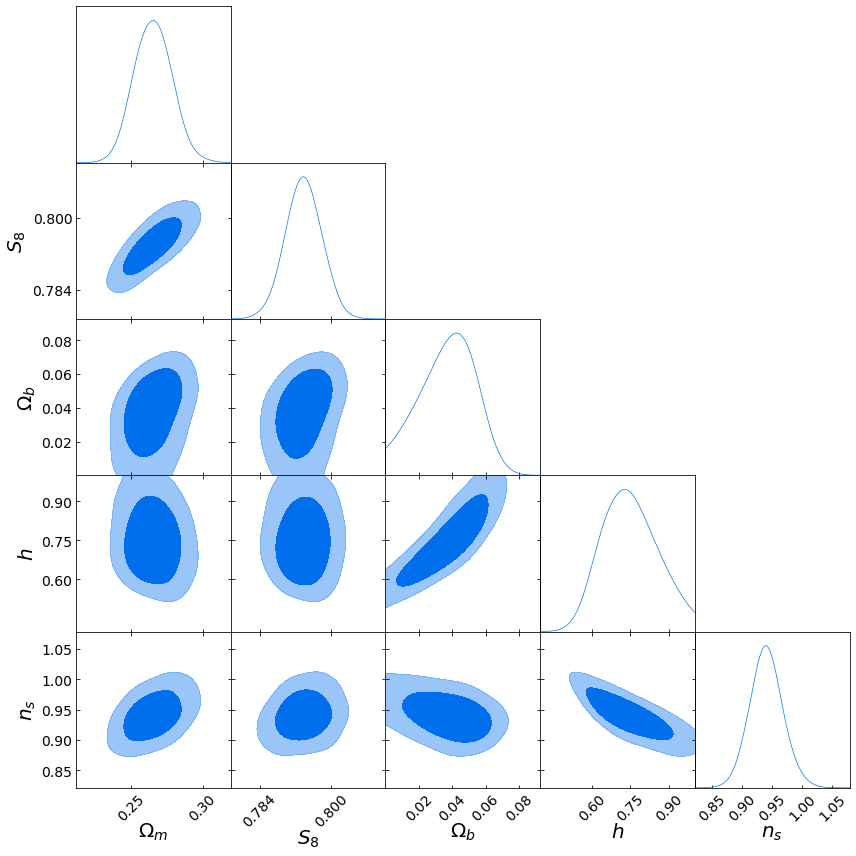

In [7]:
# Train the network
DelfiMAF.train(epochs=100, patience=5, batch_size=100)

/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


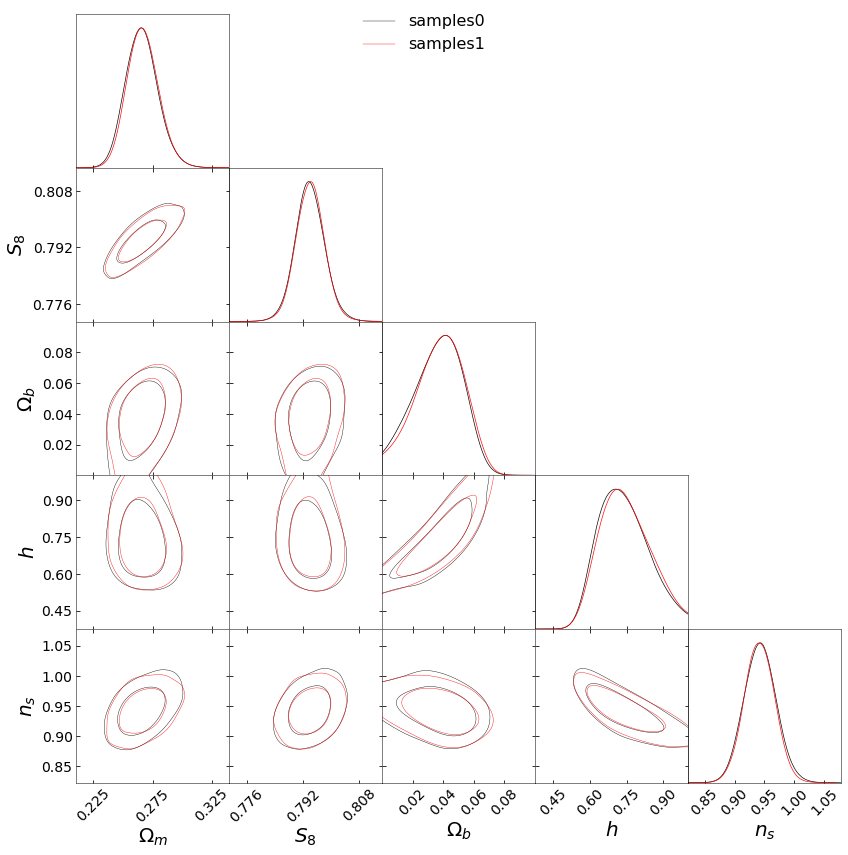

In [18]:
# Triangle plot

plt.close()
columnwidth = 40 # cm
aspect = 1.67*2
pts_per_inch = 72.27
inch_per_cm = 2.54
width = columnwidth/inch_per_cm
plt.rcParams.update({'figure.figsize': [width, width / aspect],
                 'backend': 'pdf',
                 'font.size': 14,
                 'legend.fontsize': 'small',
                 'legend.frameon': False,
                 'legend.loc': 'best',
                 'lines.markersize': 3,
                 'lines.linewidth': .5,
                 'axes.linewidth': .5,
                 'axes.edgecolor': 'black',
                 'axes.color_cycle': ['#E41A1C', '#377EB8', '#4DAF4A', '#FF7F00']})


g = plots.getSubplotPlotter(width_inch = 12)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.legend_fontsize=16
g.settings.lab_fontsize=20

samples = [DelfiMAF.posterior_samples, np.loadtxt('simulators/cosmic_shear_nuisances/results_marginalized/posterior_samples.dat')]
mc_samples = [MCSamples(samples=s, names = names, labels = labels, ranges = ranges) for s in samples]

g.triangle_plot(mc_samples, normalized=True)

for i in range(0, len(Delfi.posterior_samples[0,:])):
    for j in range(0, i+1):
        ax = g.subplots[i,j]
        xtl = ax.get_xticklabels()
        ax.set_xticklabels(xtl, rotation=45)
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

In [3]:
MDN = ndes.MixtureDensityNetwork(n_inputs=5, n_outputs=5, n_components=3, n_hidden=[50,50], activations=[tf.tanh, tf.tanh])

In [4]:
# Create the DELFI object
Delfi = delfi.Delfi(data, prior, MDN, Finv, theta_fiducial, param_limits = [lower, upper], 
                    param_names = ['\Omega_m', 'S_8', '\Omega_b', 'h', 'n_s'], results_dir = "")

In [ ]:
# Do the Fisher pre-training to initialize the network (NB this may take some time, be patient :) )
Delfi.fisher_pretraining(50000, prior, epochs=100, patience=10)

Generating fisher pre-training data...
Training the neural density estimator...
epoch 0/100: train loss 21.354663848876953, val loss 21.096515655517578
early stopping count: 0
epoch 1/100: train loss 14.774535179138184, val loss 14.77686595916748
early stopping count: 0
epoch 2/100: train loss 13.488565444946289, val loss 13.481124877929688
early stopping count: 0
epoch 3/100: train loss 12.759455680847168, val loss 12.81490421295166
early stopping count: 0
epoch 4/100: train loss 12.305774688720703, val loss 12.321338653564453
early stopping count: 0
epoch 5/100: train loss 11.380905151367188, val loss 11.42095947265625
early stopping count: 0
epoch 6/100: train loss 10.89822006225586, val loss 10.942659378051758
early stopping count: 0
epoch 7/100: train loss 10.476861000061035, val loss 10.513603210449219
early stopping count: 0
epoch 8/100: train loss 9.957602500915527, val loss 10.00299072265625
early stopping count: 0
epoch 9/100: train loss 9.668216705322266, val loss 9.71491909

epoch 86/100: train loss 4.174501895904541, val loss 4.184634208679199
early stopping count: 8
epoch 87/100: train loss 4.358108997344971, val loss 4.372941493988037
early stopping count: 9
epoch 88/100: train loss 4.100315570831299, val loss 4.114967346191406
early stopping count: 10
epoch 89/100: train loss 3.965836524963379, val loss 3.975290536880493
early stopping count: 0
epoch 90/100: train loss 4.185985565185547, val loss 4.184290885925293
early stopping count: 1
epoch 91/100: train loss 4.025073051452637, val loss 4.0324201583862305
early stopping count: 2
epoch 92/100: train loss 4.10771369934082, val loss 4.120329856872559
early stopping count: 3
epoch 93/100: train loss 4.043819904327393, val loss 4.04710054397583
early stopping count: 4
epoch 94/100: train loss 3.975513219833374, val loss 3.991361618041992
early stopping count: 5
epoch 95/100: train loss 4.048200607299805, val loss 4.0472283363342285
early stopping count: 6
epoch 96/100: train loss 3.960866928100586, val l

In [9]:
# Load in the simulations
Delfi.load_simulations(sim_data, sim_params)

Epoch 00000, Train_loss: 4.6280, Val_loss: 4.6394
Epoch 00005, Train_loss: 4.0803, Val_loss: 4.0267
Epoch 00010, Train_loss: 4.0070, Val_loss: 3.9760
Epoch 00015, Train_loss: 4.0100, Val_loss: 3.9875
Epoch 00020, Train_loss: 3.9414, Val_loss: 3.9285
Epoch 00025, Train_loss: 3.9591, Val_loss: 3.9492
Epoch 00030, Train_loss: 3.9715, Val_loss: 3.9682
Epoch 00035, Train_loss: 3.9532, Val_loss: 3.9553
Epoch 00040, Train_loss: 3.9213, Val_loss: 3.9266
Epoch 00045, Train_loss: 3.9648, Val_loss: 3.9743
Epoch 00050, Train_loss: 3.9548, Val_loss: 3.9600
Epoch 00055, Train_loss: 3.9717, Val_loss: 3.9639
Epoch 00060, Train_loss: 3.9444, Val_loss: 3.9567
Training finished
Best epoch 00055, Val_loss: 3.9266
INFO:tensorflow:Restoring parameters from ./tmp_model


INFO:tensorflow:Restoring parameters from ./tmp_model


Sampling approximate posterior...
Done.
Saving post_trained.pdf


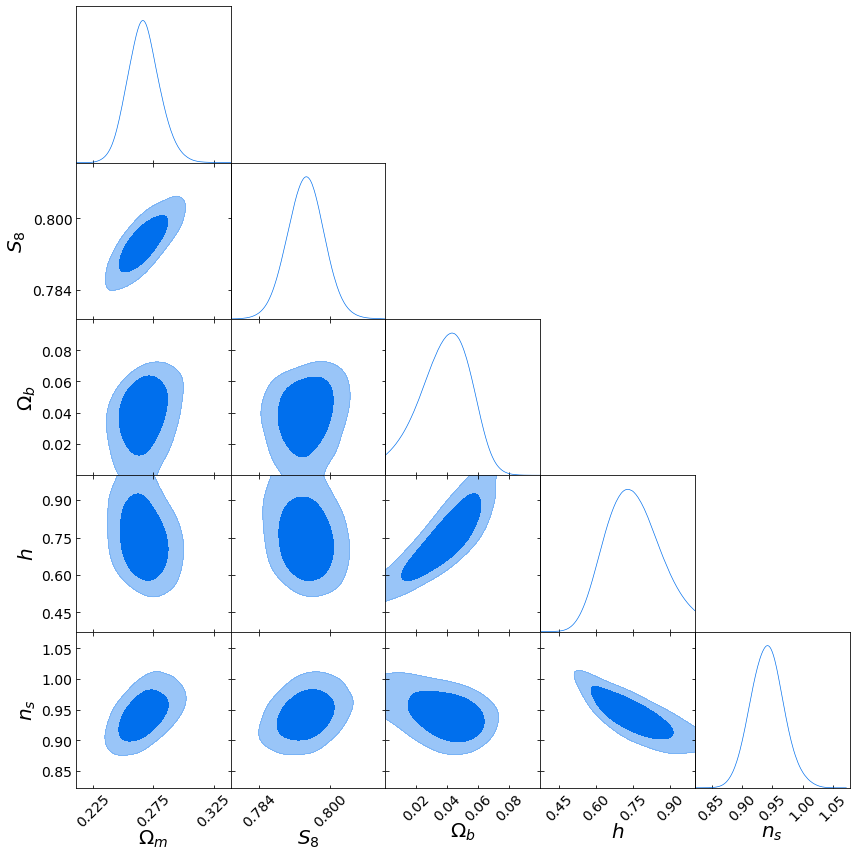

In [10]:
# Train the network
Delfi.train(epochs=500, patience=20, batch_size=100)

/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


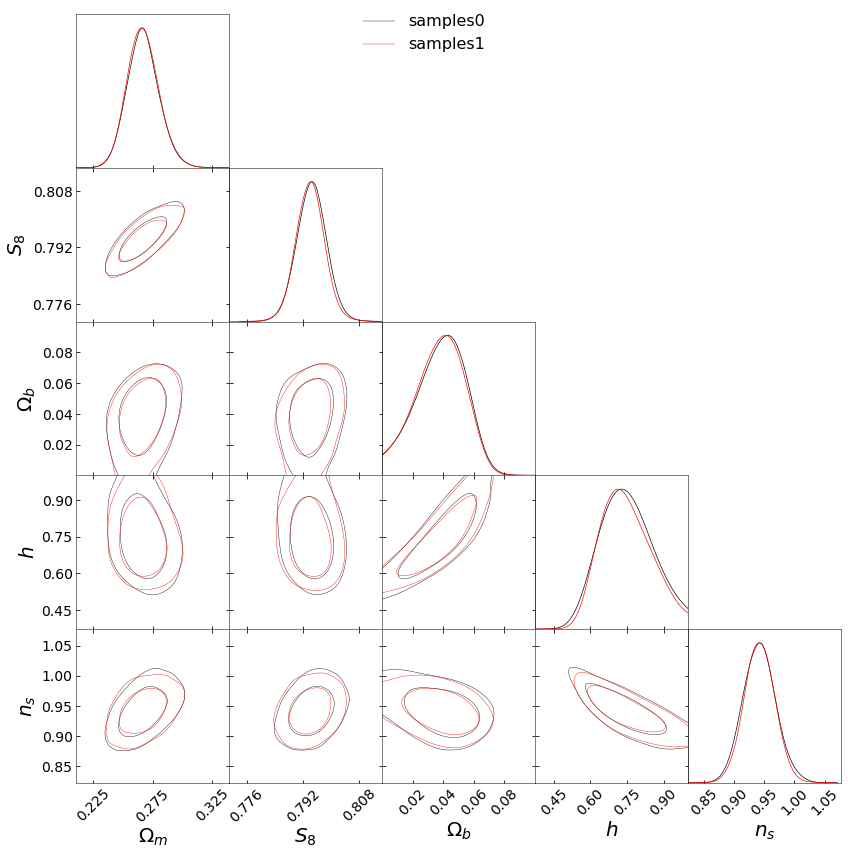

In [11]:
# Triangle plot

plt.close()
columnwidth = 40 # cm
aspect = 1.67*2
pts_per_inch = 72.27
inch_per_cm = 2.54
width = columnwidth/inch_per_cm
plt.rcParams.update({'figure.figsize': [width, width / aspect],
                 'backend': 'pdf',
                 'font.size': 14,
                 'legend.fontsize': 'small',
                 'legend.frameon': False,
                 'legend.loc': 'best',
                 'lines.markersize': 3,
                 'lines.linewidth': .5,
                 'axes.linewidth': .5,
                 'axes.edgecolor': 'black',
                 'axes.color_cycle': ['#E41A1C', '#377EB8', '#4DAF4A', '#FF7F00']})


g = plots.getSubplotPlotter(width_inch = 12)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.legend_fontsize=16
g.settings.lab_fontsize=20

samples = [Delfi.posterior_samples, np.loadtxt('simulators/cosmic_shear_nuisances/results_marginalized/posterior_samples.dat')]
mc_samples = [MCSamples(samples=s, names = names, labels = labels, ranges = ranges) for s in samples]

g.triangle_plot(mc_samples, normalized=True)

for i in range(0, len(Delfi.posterior_samples[0,:])):
    for j in range(0, i+1):
        ax = g.subplots[i,j]
        xtl = ax.get_xticklabels()
        ax.set_xticklabels(xtl, rotation=45)
plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()